## Masalah Sorting

Diberikan barisan tak terurut $A=\{a_1, a_2, \cdots, a_N\}$, dimana $a_1, a_2, \cdots, a_N$ adalah bilangan bulat. Tujuannya adalah ingin __mengurutkan__ elemen-elemen di $A$ sedemikian sehingga terbentuk barisan terurut $A=\{a_1^*, a_2^*, \cdots, a_N^*\}$, dimana $a_1^* \leq a_2^* \leq \cdots \leq a_N^*$ (ascending).

Best-Case:
A = {1,2,3,4,5}

A* = {1,2,3,4,5}

Worst-Case:
A = {5,4,3,2,1}

A* = {1,2,3,4,5}

### Implementasi Bubble Sort (Brute-Force)


```
Algoritma: BubbleSort (A)
  N = len(A)
  for i=0 to N-1  ------------------- N
    for j=0 to N-1 ------------------ N*N
      if A[j] > A[j+1] -------------- N*N
        # Tukar elemen
        temp = A[j] ----------------- N*N
        A[j] = A[j+1] --------------- N*N
        A[j+1] = temp --------------- N*N
        ##############
      endif
    endfor
  endfor ---------------------------------- +
  return A                    T(N) = 5N^2 + N
```

Worst-Case: $T(N) = 5N^2 + N = O(N^2)$

Best-Case: $T(N) = 1 = O(1)$

Average-Case: $T(N) = (5N^2 + N + 1)/2 = O(N^2)$

In [ ]:
def bubbleSort(arr):
  panjang_arr = len(arr)
  for i in range(panjang_arr-1):
    for j in range(panjang_arr-1):
      if arr[j] > arr[j+1]:
        arr[j], arr[j+1] = arr[j+1], arr[j] # Penukaran elemen 
  return arr

### Implementasi Merge Sort (Divide and Conquer)

```
Algoritma: MergeSort (l, h)
  if l < h ---------------------------------------- 1
    mid = ceil((l+h)/2) --------------------------- 1
    MergeSort(l, mid) ----------------------------- T(N/2)
    MergeSort(mid+1, h) --------------------------- T(N/2)
    Merge(A, l, mid, h) --------------------------- O(N)
  return A ----------------------------------------------- +
                                                    T(N) = 2T(N/2) + 2 + O(N)

Algoritma: Merge (A, l, mid, h) ------ T(N) = O(N)
  n1 = mid - l + 1
  n2 = h - mid

  Misalkan L[1..n1 + 1] dan R[1..n2 + 1]
  for i = 1 to n1
    L[i] = A[l + i - 1]
  for j = 1 to n2
    R[j] = A[q + j]
  L[n1 + 1] = \infty
  R[n2 + 1] = \infty

  i = 1, j = 1
  for k = l to h
    if L[i] <= R[j]
      A[k] = L[i]
      i = i + 1
    else 
      A[k] = R[j]
      j = j + 1
```

Worst-Case: $O(N \log N)$

Best-Case: $\Omega(N \log N)$

Average-Case: $\Theta(N \log N)$

In [ ]:
def mergeSort(arr):
  panjang_arr = len(arr) # Menentukan panjang barisan

  # Cek jika panjang barisan == 1 maka barisan sudah tersortir
  if panjang_arr == 1: 
    return arr
  
  # Menentukan titik tengah dari barisan
  mid = panjang_arr // 2

  # Buat partisi sebelah kanan dan kiri
  partisi_kiri = mergeSort(arr[:mid])
  partisi_kanan = mergeSort(arr[mid:])

  return merge(partisi_kiri, partisi_kanan)

def merge(kiri, kanan):
  # Inisialisasi output
  output = []
  i = j = 0

  # Penukaran elemen di partisi kiri dan kanan
  while i < len(kiri) and j < len(kanan):
    if kiri[i] < kanan[j]:
      output.append(kiri[i])
      i += 1
    else:
      output.append(kanan[j])
      j += 1
      
  # penggabungan elemen
  output.extend(kiri[i:])
  output.extend(kanan[j:])

  return output

In [ ]:
barisan = [4,0,6,5,3,9,8,2,1,7]
print(barisan)
barisan_sorted = mergeSort(barisan)
print(barisan_sorted)

[4, 0, 6, 5, 3, 9, 8, 2, 1, 7]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [ ]:
barisan_sorted_bubble_sort = bubbleSort(barisan)
print(barisan_sorted_bubble_sort)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


###Tugas

Buatlah suatu eksperimen dengan mengubah-ubah N (yaitu banyaknya elemen) N1 = 10, N2 = 50, N3 = 100, N4 = 500, N5 = 1000, N6 = 2000, N7 = 5000, N8 = 10000. Hitung waktu eksekusi untuk tiap-tiap N (N1, N2, ..., N8) dengan library `time` di python pada Algoritma Bubble Sort dan Merge Sort. Buat juga grafiknya (sumbu-x menyatakan N dan sumbu-y menyatakan waktu eksekusi)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [ ]:
def exec(n=1, flag='MS'):
  T = []
  for i in range(1, n+1):
    S = np.random.randint(0,1000,i)
    if flag == 'MS':
      start_time = time.time()
      mergeSort(S)
      end_time = time.time()
    elif flag == 'BS':
      start_time = time.time()
      bubbleSort(S)
      end_time = time.time()

    T.append(end_time - start_time)

  return T

In [ ]:
waktu_MS = exec(1000, 'MS')
print(waktu_MS)

[1.9073486328125e-06, 1.6927719116210938e-05, 1.6450881958007812e-05, 5.602836608886719e-05, 4.267692565917969e-05, 3.0040740966796875e-05, 3.361701965332031e-05, 3.838539123535156e-05, 4.5299530029296875e-05, 5.0067901611328125e-05, 6.389617919921875e-05, 6.461143493652344e-05, 6.818771362304688e-05, 7.939338684082031e-05, 9.965896606445312e-05, 9.608268737792969e-05, 0.00010228157043457031, 0.00010395050048828125, 0.0001246929168701172, 0.00011157989501953125, 0.00011157989501953125, 0.00012969970703125, 0.00012493133544921875, 0.00013637542724609375, 0.0002727508544921875, 0.00013589859008789062, 0.00014400482177734375, 0.00033545494079589844, 0.0001652240753173828, 0.00014734268188476562, 0.00017595291137695312, 0.00031566619873046875, 0.0002281665802001953, 0.0002205371856689453, 0.0004076957702636719, 0.00030493736267089844, 0.00024819374084472656, 0.0002422332763671875, 0.0002493858337402344, 0.00043654441833496094, 0.0003743171691894531, 0.00037407875061035156, 0.00061058998107

In [ ]:
waktu_BS = exec(1000, 'BS') # Butuh waktu 10 menit lebih!

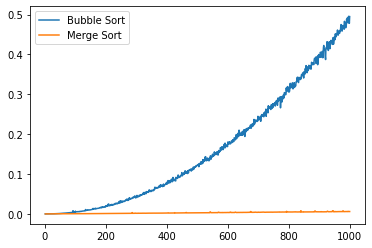

In [ ]:
X = np.linspace(1, 1000, 1000)
plt.plot(X, waktu_BS, label='Bubble Sort')
plt.plot(X, waktu_MS[:1000], label='Merge Sort')
plt.legend();

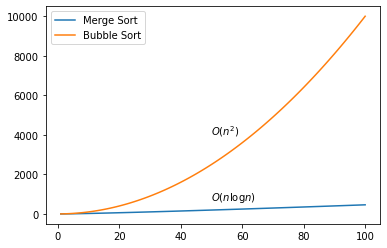

In [ ]:
x = np.linspace(1, 100, 100)
f1 = x*np.log(x)
f2 = x**2
plt.plot(x, f1, x, f2);
plt.annotate('$O(n \log n)$', (50, 700))
plt.annotate('$O(n^2)$', (50, 4000))
#plt.ylim([0, 5]);
#plt.xlim([1,2]);
plt.legend(["Merge Sort", "Bubble Sort"]);